In [10]:
import pandas as pd

df_employee = pd.read_csv("Current_Employee_Names__Salaries__and_Position_Titles.csv")

In [11]:
df_employee

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"CABALLERO, SAMUEL A",FOREMAN OF MOTOR TRUCK DRIVERS,DEPT STREETS AND SANITATION,F,HOURLY,40.0,NaN,41.41
1,"CHAPMAN, BRYAN A",FIREFIGHTER-EMT (RECRUIT),FIRE DEPARTMENT,F,SALARY,NaN,80448.0,NaN
2,"MUNOZ, LISSETTE C",POLICE OFFICER,DEPARTMENT OF POLICE,F,SALARY,NaN,97974.0,NaN
3,"ALDERDEN, JACOB M",CAPTAIN,DEPARTMENT OF POLICE,F,SALARY,NaN,159552.0,NaN
4,"JOHNSON, ANTHONY L",MOTOR TRUCK DRIVER,DEPT OF WATER MANAGEMENT,F,HOURLY,40.0,NaN,39.25
...,...,...,...,...,...,...,...,...
30854,"LADUZINSKY, MARK J",POLICE OFFICER,DEPARTMENT OF POLICE,F,SALARY,NaN,111966.0,NaN
30855,"MARCIANO, DAVID",POLICE OFFICER,DEPARTMENT OF POLICE,F,SALARY,NaN,97974.0,NaN
30856,"CHORZEPA, PETER J",POLICE OFFICER,DEPARTMENT OF POLICE,F,SALARY,NaN,97974.0,NaN
30857,"SEPCOT, SEAN W",POLICE OFFICER,DEPARTMENT OF POLICE,F,SALARY,NaN,104934.0,NaN


In [12]:
df_employee["Annual Salary"] = pd.to_numeric(df_employee["Annual Salary"], errors='coerce').fillna(0)
df_employee["Hourly Rate"] = pd.to_numeric(df_employee["Hourly Rate"], errors='coerce').fillna(0)

In [13]:
# Replace all NaN values with 0
numerical_columns = df_employee[["Annual Salary", "Hourly Rate"]]

# Check the result (you can display the first few rows to confirm)
numerical_columns.head()

,Annual Salary,Hourly Rate
0,0.0,41.41
1,80448.0,0.00
2,97974.0,0.00
3,159552.0,0.00
4,0.0,39.25


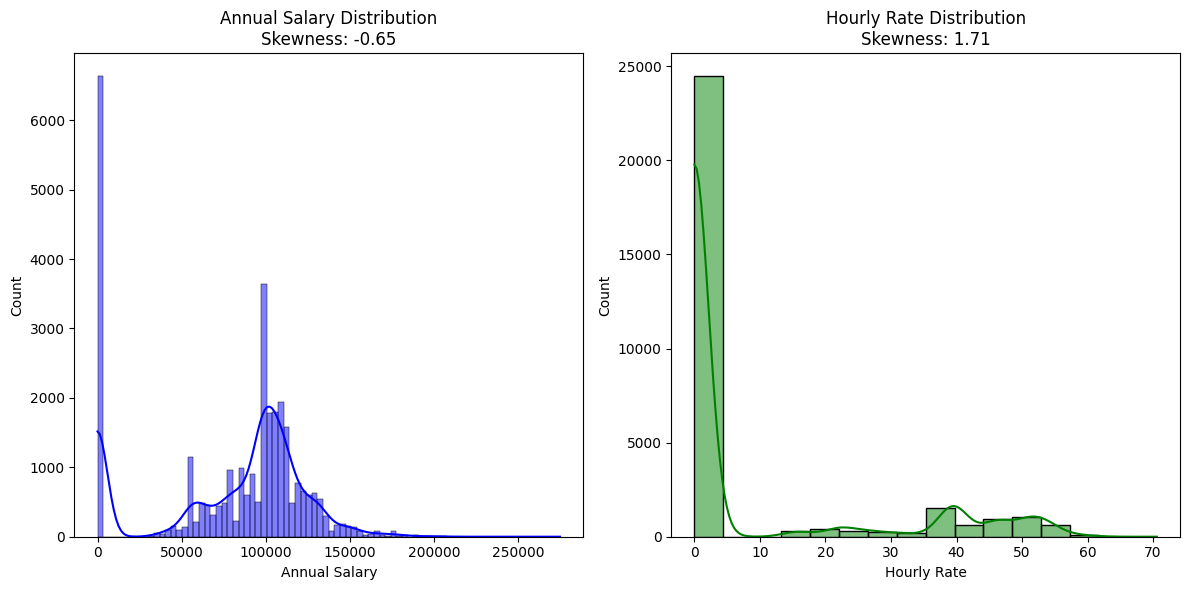

Annual Salary   -0.645259
Hourly Rate      1.714260
dtype: float64


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

# Calculate skewness for each column
skewness_values = numerical_columns.apply(skew)

# Plot distributions and show skewness
plt.figure(figsize=(12, 6))

# Plot for Annual Salary
plt.subplot(1, 2, 1)
sns.histplot(numerical_columns["Annual Salary"], kde=True, color="blue")
plt.title(f"Annual Salary Distribution\nSkewness: {skewness_values['Annual Salary']:.2f}")

# Plot for Hourly Rate
plt.subplot(1, 2, 2)
sns.histplot(numerical_columns["Hourly Rate"], kde=True, color="green")
plt.title(f"Hourly Rate Distribution\nSkewness: {skewness_values['Hourly Rate']:.2f}")

plt.tight_layout()
plt.show()

# Display skewness values
print(skewness_values)


#### The rule of thumb seems to be: 
* If the skewness is between -0.5 and 0.5, the data are fairly symmetrical. 
* If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed. 
* If the skewness is less than -1 or greater than 1, the data are highly skewed.